<a href="https://colab.research.google.com/github/Li220Fish/DL-CLASS/blob/main/Ch_02_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**import 套件**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
from IPython.display import display, clear_output
twfont1=plt_font.FontProperties(fname="drive/My Drive/DL_CLASS/kaiu.ttf")

**導入資料**

In [ ]:
#由SalesVolume.csv檔案載入資料集
data= np.loadtxt("drive/My Drive/DL_CLASS/SalesVolume.csv",delimiter=",")
data_x=data[0]#第1列為廣告推播次數
data_y=data[1]#第2列為商品銷售數量
#訓練資料集12筆
train_x = data_x[:12]
train_y = data_y[:12]
#驗證資料集8筆
valid_x = data_x[12:]
valid_y = data_y[12:]

**隨機初始化b、w**

In [ ]:
b = np.random.rand()
w = np.random.rand()

**定義回歸模型的線性函數**

In [ ]:
def F(x):
  return b + w*x

**定義損失函數LOSS** **Funcation**

In [ ]:
def Loss(x, y):
  return 0.5*np.sum((y-F(x))**2)

**設定學習率和權重更新次數**

In [ ]:
ETA=0.0007#學習率
#儲存學習的狀態
Step_Loss=[]
Step_b=[]
Step_w=[]

**開始訓練模型**

In [ ]:
for epoch in range(20000):
    b = b - ETA*np.sum(F(train_x)-train_y)
    w = w - ETA*np.sum((F(train_x)-train_y)*train_x)
    if epoch%100==99:
        current_loss=Loss(train_x,train_y)
        print("訓練次數:",epoch+1,"\nb:",b,"\nw:",w,"\n損失函數:",current_loss)
        Step_Loss.append(current_loss)
        Step_b.append(b)
        Step_w.append(w)
        clear_output(wait=True)

訓練次數: 20000 
b: 245.0272503261263 
w: 13.414117988114686 
損失函數: 5256.161037831568


**畫圖檢查模型訓練結果**

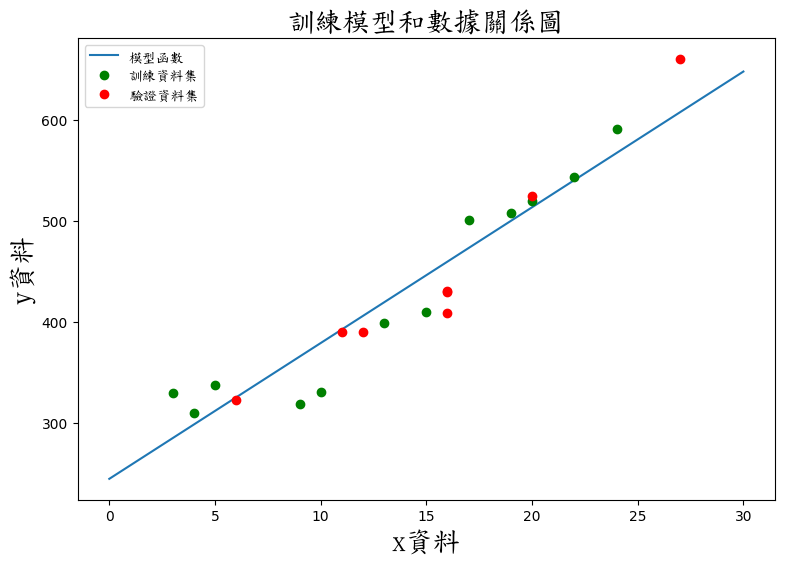

In [ ]:
plt.figure(figsize=(9,6))
plt.title("訓練模型和數據關係圖",fontproperties=twfont1,fontsize=20)
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20)
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
x=np.linspace(0,30, 2000)
plt.plot(x, F(x),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.show()

**觀察Loss值隨訓練次數的變化**

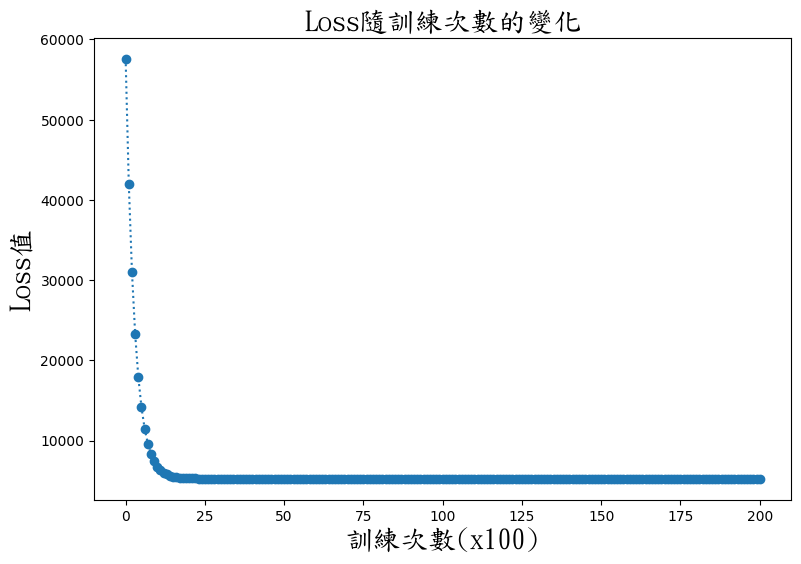

In [ ]:
plt.figure(figsize=(9,6))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20)
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.show()